<a href="https://colab.research.google.com/github/Ak13-moneyguy/heart_atatck_classifier/blob/main/Heart_attack_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

Saving heart.csv to heart.csv


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split

X = df.drop('output', axis=1)
y = df.iloc[:, 13]
y = np.array(y).reshape(-1,1)

random_forest = RandomForestClassifier()
svc = SVC(C=2)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

In [43]:
random_forest.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
from sklearn.metrics import *

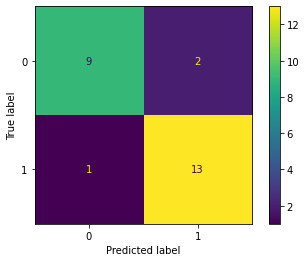

In [45]:
rfc_pred = random_forest.predict(X_test)
conf_matrix = confusion_matrix(y_test, rfc_pred)
conf_matrix_display = plot_confusion_matrix(random_forest, X_test, y_test)

In [46]:
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

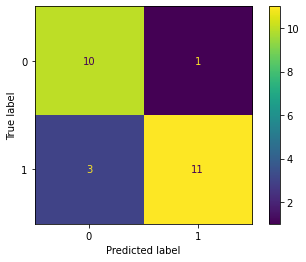

In [47]:
svc_pred = svc.predict(X_test)
conf_matrix = confusion_matrix(y_test, svc_pred)
conf_matrix_display = plot_confusion_matrix(svc, X_test, y_test)

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [49]:
param_grid = {'max_features': [5, 7, 9, 11, 13],
              'n_estimators': [100, 75, 50, 25],
              'max_depth': [6, 10, 12, 14, 25]
              }

y_train = y_train.ravel()

grid_search = RandomizedSearchCV(random_forest, param_grid)

In [50]:
grid_search.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [51]:
print(grid_search.score(X_train, y_train)*100)

grid_search.best_params_

100.0


{'max_depth': 12, 'max_features': 11, 'n_estimators': 50}

In [52]:
param_df = []

def param(depth, estimator, feature):
  for x in depth:
    for y in estimator:
      for z in feature:
        random_forest_upd = RandomForestClassifier(max_depth=x, n_estimators=y, max_features=z)

        random_forest_upd.fit(X_train, y_train) 

        accuracy = random_forest_upd.score(X_test, y_test)
        param_df.append([x,y,z,accuracy*100])
  return param_df

param(param_grid['max_depth'], param_grid['n_estimators'], param_grid['max_features'])

[[6, 100, 5, 88.0],
 [6, 100, 7, 84.0],
 [6, 100, 9, 88.0],
 [6, 100, 11, 84.0],
 [6, 100, 13, 88.0],
 [6, 75, 5, 84.0],
 [6, 75, 7, 88.0],
 [6, 75, 9, 88.0],
 [6, 75, 11, 88.0],
 [6, 75, 13, 84.0],
 [6, 50, 5, 88.0],
 [6, 50, 7, 84.0],
 [6, 50, 9, 84.0],
 [6, 50, 11, 80.0],
 [6, 50, 13, 84.0],
 [6, 25, 5, 88.0],
 [6, 25, 7, 84.0],
 [6, 25, 9, 84.0],
 [6, 25, 11, 80.0],
 [6, 25, 13, 76.0],
 [10, 100, 5, 84.0],
 [10, 100, 7, 88.0],
 [10, 100, 9, 84.0],
 [10, 100, 11, 84.0],
 [10, 100, 13, 84.0],
 [10, 75, 5, 80.0],
 [10, 75, 7, 88.0],
 [10, 75, 9, 84.0],
 [10, 75, 11, 84.0],
 [10, 75, 13, 84.0],
 [10, 50, 5, 80.0],
 [10, 50, 7, 80.0],
 [10, 50, 9, 84.0],
 [10, 50, 11, 88.0],
 [10, 50, 13, 80.0],
 [10, 25, 5, 84.0],
 [10, 25, 7, 80.0],
 [10, 25, 9, 84.0],
 [10, 25, 11, 84.0],
 [10, 25, 13, 84.0],
 [12, 100, 5, 84.0],
 [12, 100, 7, 80.0],
 [12, 100, 9, 80.0],
 [12, 100, 11, 80.0],
 [12, 100, 13, 84.0],
 [12, 75, 5, 84.0],
 [12, 75, 7, 80.0],
 [12, 75, 9, 84.0],
 [12, 75, 11, 84.0],
 [12, 

In [57]:
param_df = pd.DataFrame(param_df, columns=['max_depth', 'n_estimators', 'max_features', 'accuracy'])

optimal_param = pd.DataFrame(param_df.where(param_df['accuracy']>90.0), columns=['max_depth', 'n_estimators', 'max_features', 'accuracy'])
optimal_param.describe()

,max_depth,n_estimators,max_features,accuracy
count,1.0,1.0,1.0,1.0
mean,14.0,50.0,11.0,92.0
std,NaN,NaN,NaN,NaN
min,14.0,50.0,11.0,92.0
25%,14.0,50.0,11.0,92.0
50%,14.0,50.0,11.0,92.0
75%,14.0,50.0,11.0,92.0
max,14.0,50.0,11.0,92.0


In [59]:
final_classifer = RandomForestClassifier(max_depth=14, n_estimators=50, max_features=11)

final_classifer.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

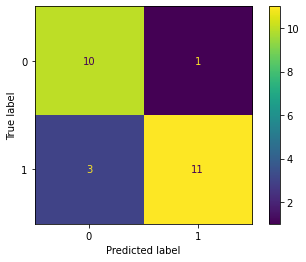

In [61]:
pred = final_classifer.predict(X_test)

conf_matrix = confusion_matrix(y_test, pred)
conf_matrix_display = plot_confusion_matrix(final_classifer, X_test, y_test)
conf_matrix_display